In [123]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings

In [124]:
train = pd.read_excel('Data_Train.xlsx', header=0)
test = pd.read_excel('Data_Test.xlsx', header=0)


In [125]:
train.shape

(12690, 9)

In [126]:
test.shape

(4231, 8)

In [127]:
restaurant = pd.concat([train,test])

In [128]:
restaurant.shape

(16921, 9)

In [10]:
import pandas_profiling
pandas_profiling.ProfileReport(restaurant)

In [129]:
restaurant.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES'],
      dtype='object')

In [319]:
restaurant.isna().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
city_split          0
votes_clean         0
dtype: int64

Text(0, 0.5, 'Cost of the Restaurant')

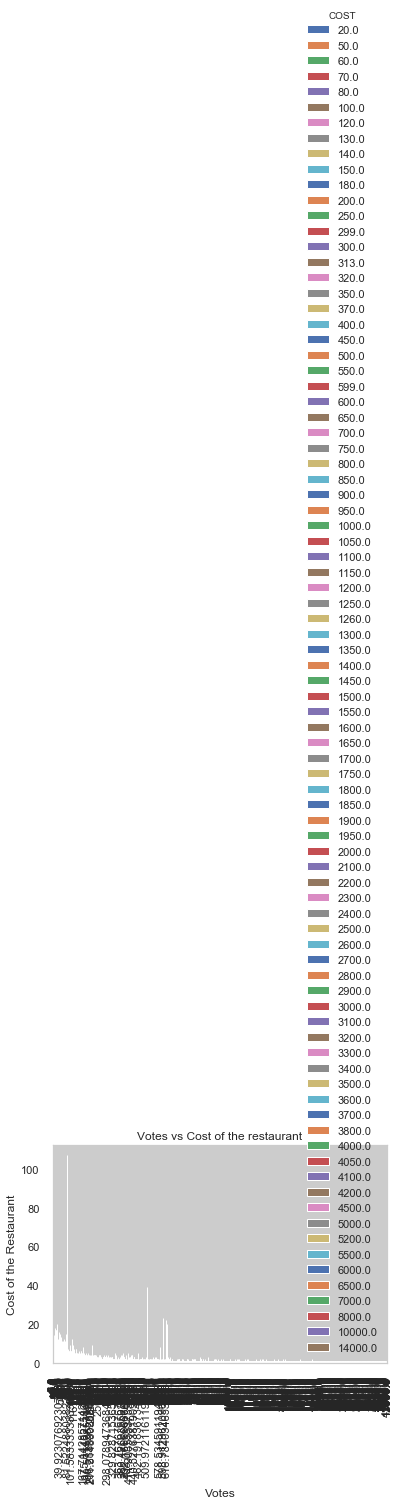

In [322]:
%matplotlib inline
pd.crosstab(restaurant.votes_clean,restaurant.COST).plot(kind='bar')
plt.title('Votes vs Cost of the restaurant')
plt.xlabel('Votes')
plt.ylabel('Cost of the Restaurant')
plt.savefig('purchase_fre_job')

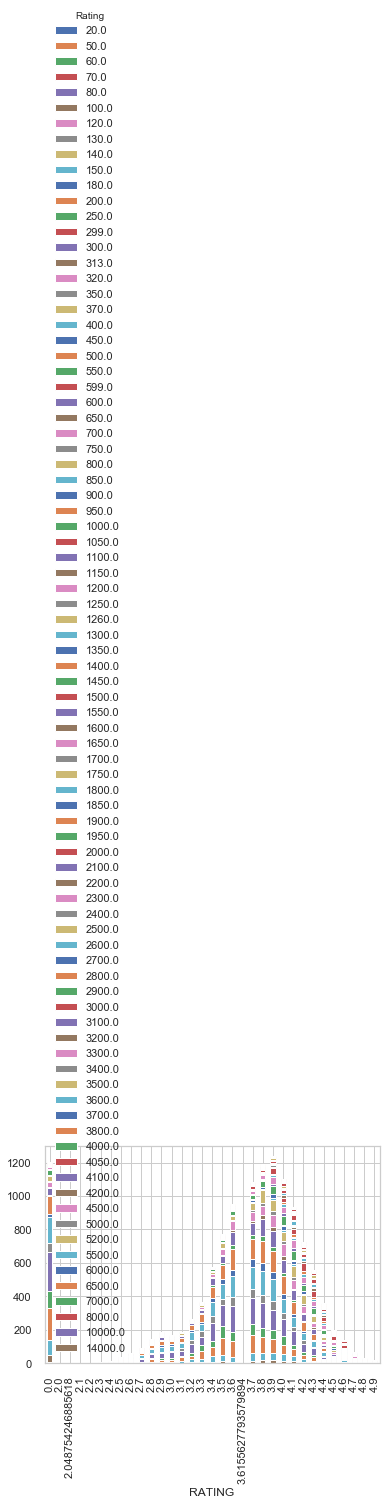

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt
ct = pd.crosstab(restaurant.RATING, restaurant.COST)
ct.plot.bar(stacked=True)
plt.legend(title='Rating')

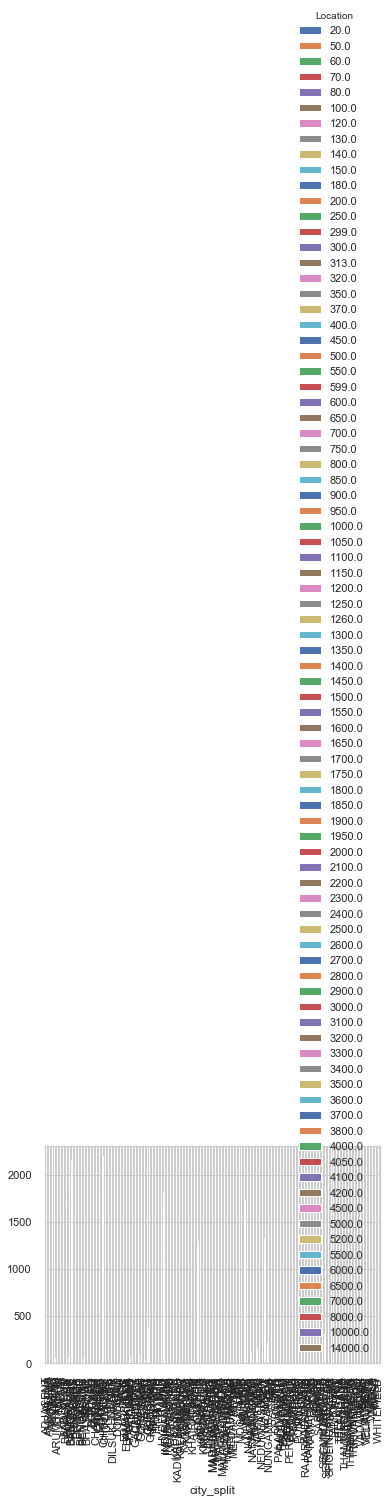

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt
ct = pd.crosstab(restaurant.city_split, restaurant.COST)
ct.plot.bar(stacked=True)
plt.legend(title='Location')

In [131]:
#'CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
#      'TIME', 'TITLE', 'VOTES'
cuisines_split=pd.Series(restaurant["CUISINES"]).str.get_dummies(sep=',')

In [132]:
restaurant["city_split"] = restaurant.CITY.apply(lambda x : str(x).upper().split(' ')[0])
#restaurant["CITY"].unique()

In [133]:
#restaurant.CITY.unique()
#restaurant["City_split"] = restaurant.CITY.transform(lambda x: x.split(',')[0])
restaurant.city_split.value_counts().sum()


16921

In [16]:
restaurant.city_split.value_counts()

CHENNAI        2881
BANGALORE      2843
HYDERABAD      2462
MUMBAI         2324
KOCHI          1769
               ... 
GANDIPET          1
NARAYANGUDA       1
SAKET             1
KUKATAPALLY       1
PALM              1
Name: city_split, Length: 285, dtype: int64

In [57]:
#restaurant.groupby("city_split").LOCALITY.apply(lambda x : x.mode()[0])
restaurant["LOCALITY"]= restaurant.LOCALITY.transform(lambda x : x.fillna('UNK'))
#df["Outlet_Size"] = df.groupby("Outlet_Location_Type").Outlet_Size.transform(lambda x : x.fillna(x.mode()[0]))
#restaurant.groupby("LOCALITY").CITY.unique()
#restaurant[pd.isnull(restaurant["city_split"])] #.city_split.value_counts()

In [58]:
restaurant.isna().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY            0
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
city_split          0
dtype: int64

In [105]:
restaurant.RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', nan,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [136]:
#type(restaurant["RATING"])
#restaurant[restaurant[pd.Series(restaurant["RATING"]).str.isnumeric()]]
#np.number
restaurant.RATING.replace({"NEW" : 0.0 ,"-": 0.0},inplace=True)
#pd.Series(restaurant["RATING"]).unique()


In [137]:
restaurant.RATING.dtype

dtype('O')

In [138]:
restaurant["RATING"]= pd.to_numeric(restaurant["RATING"])
#df["a"] = pd.to_numeric(df["a"])

In [140]:
restaurant["RATING"] = restaurant.groupby("city_split").RATING.transform(lambda x : x.fillna(x.mean()))

In [141]:
restaurant.RATING.unique()

array([3.6       , 4.2       , 3.8       , 4.1       , 4.        ,
       4.3       , 3.9       , 3.3       , 3.4       , 0.        ,
       4.5       , 3.5       , 4.4       , 2.7       , 3.7       ,
       4.7       , 3.1       , 2.5       , 4.6       , 2.8       ,
       2.04875425, 3.        , 3.2       , 2.6       , 2.9       ,
       3.61556278, 4.9       , 4.8       , 2.4       , 2.3       ,
       2.        , 2.1       , 2.2       ])

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,city_split,votes_clean
13,Kochi,400.0,South Indian,Edappally,0.0,4319,11am – 11:30pm (Mon-Sun),CASUAL DINING,NaN,KOCHI,nan
62,Kochi,200.0,"North Indian, Beverages",Kalamassery,0.0,7841,11am – 11pm (Mon-Sun),QUICK BITES,NaN,KOCHI,nan
69,New Delhi,200.0,"Pizza, Fast Food",Kalkaji,0.0,11096,11am – 11pm (Mon-Sun),None,NaN,NEW,nan
85,Bangalore,300.0,"North Indian, South Indian",Vijay Nagar,0.0,12657,"Closed (Mon),7:30am – 10:30pm (Tue-Sun)",QUICK BITES,NaN,BANGALORE,nan
111,Mumbai,800.0,"Gujarati, Rajasthani, North Indian",Borivali West,0.0,7095,"11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,NaN,MUMBAI,nan
...,...,...,...,...,...,...,...,...,...,...,...
4183,Noida,NaN,"Cafe, North Indian",Sector 63,0.0,7007,11am – 11pm (Mon-Sun),CAFÉ,NaN,NOIDA,nan
4185,New Delhi,NaN,Fast Food,Shalimar Bagh,0.0,6387,12:30pm – 10:30pm (Mon-Sun),QUICK BITES,NaN,NEW,nan
4198,Bangalore,NaN,Continental,Indiranagar,0.0,13381,11am – 12midnight (Mon-Sun),QUICK BITES,NaN,BANGALORE,nan
4223,Mumbai,NaN,"Sindhi, Street Food",Lower Parel,0.0,6887,"11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",CASUAL DINING,NaN,MUMBAI,nan


In [185]:
restaurant["votes_clean"] = restaurant.VOTES.apply(lambda x : str(x).split(' ')[0])

In [186]:
restaurant.votes_clean.replace({'nan':np.nan},inplace=True)

In [187]:
restaurant["votes_clean"] = pd.to_numeric(restaurant["votes_clean"] )

In [200]:
restaurant.votes_clean.isna().sum()

1606

In [201]:
#restaurant.groupby("city_split").votes_clean.mean()
restaurant["votes_clean"] = restaurant.groupby("city_split").votes_clean.transform( lambda x : x.fillna(x.mean()))

In [203]:
restaurant["votes_clean"] = restaurant.votes_clean.transform( lambda x : x.fillna(x.mean()))

In [210]:
restaurant.isna().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
city_split          0
votes_clean         0
dtype: int64

In [35]:
#restaurant[restaurant["LOCALITY"]==np.nan]
restaurant[pd.isnull(restaurant["city_split"])]
#.LOCALITY.value_counts()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,city_split


In [212]:
restaurant.city_split.unique()

array(['THANE', 'CHENNAI', 'MUMBAI', 'BANGALORE', 'GURGAON', 'HYDERABAD',
       'KOCHI', 'ANDHERI', 'NEW', 'MALAD', '682036', 'BANGALOR', 'NAVI',
       'BANDRA', 'DELHI', 'NOIDA', 'BANGALORE-560066', 'SECUNDERABAD',
       'NAN', 'INDIA', 'MADHURANAGAR', 'FARIDABAD', 'CHEMBUR.',
       'MAHARASHTRA', 'OPP', 'TELAGANA', 'GHAZIABAD', 'KARNATAKA',
       'KERALA', 'EDAPPALLY', 'KADAVANTHRA', 'ERNAKULAM', 'BENGALORE',
       'NEAR', 'KILPAUK', 'BENGALURU', 'KOTHAGUDA', 'GOREGAON',
       'BANGLORE', 'TAMIL', 'KAKKANAD', 'OUTER', 'MULUND', 'TELANGANA',
       'PONNURUNI', 'GACHIBOWLI', 'SEMMANCHERI', '5TH', 'POWAI',
       'DOMBIVALI', 'KANDIVALI', 'DEWAN', 'GURUGRAM', 'SECTOR', 'KALOOR',
       'BESANT', 'ARUMBAKKAM', 'ADJACENT', 'DWARKA', '682035.', 'KALYAN',
       'AVADI', 'KONDAPUR', 'MEHDIPATNAM', 'GANDIPET', 'VELACHERY',
       'PALLAVARAM', 'VIJAYA', 'BTM', 'METRO', 'JP', 'MADHAPUR',
       'SARJAPUR', 'WHITEFIELD', 'KOCHI-683101', 'ROHINI', 'KAROL',
       'PERUNGUDI', 'THYKOODAM

In [225]:
restaurant['city_split'] = restaurant.city_split.str.replace(r'\d+','')

In [ ]:
restaurant['city_split'] = restaurant.city_split.str.replace('-','')

In [227]:
restaurant['city_split'] = restaurant.city_split.str.replace('.','')

In [228]:
restaurant.city_split.unique()

array(['THANE', 'CHENNAI', 'MUMBAI', 'BANGALORE', 'GURGAON', 'HYDERABAD',
       'KOCHI', 'ANDHERI', 'NEW', 'MALAD', '', 'BANGALOR', 'NAVI',
       'BANDRA', 'DELHI', 'NOIDA', 'SECUNDERABAD', 'NAN', 'INDIA',
       'MADHURANAGAR', 'FARIDABAD', 'CHEMBUR', 'MAHARASHTRA', 'OPP',
       'TELAGANA', 'GHAZIABAD', 'KARNATAKA', 'KERALA', 'EDAPPALLY',
       'KADAVANTHRA', 'ERNAKULAM', 'BENGALORE', 'NEAR', 'KILPAUK',
       'BENGALURU', 'KOTHAGUDA', 'GOREGAON', 'BANGLORE', 'TAMIL',
       'KAKKANAD', 'OUTER', 'MULUND', 'TELANGANA', 'PONNURUNI',
       'GACHIBOWLI', 'SEMMANCHERI', 'TH', 'POWAI', 'DOMBIVALI',
       'KANDIVALI', 'DEWAN', 'GURUGRAM', 'SECTOR', 'KALOOR', 'BESANT',
       'ARUMBAKKAM', 'ADJACENT', 'DWARKA', 'KALYAN', 'AVADI', 'KONDAPUR',
       'MEHDIPATNAM', 'GANDIPET', 'VELACHERY', 'PALLAVARAM', 'VIJAYA',
       'BTM', 'METRO', 'JP', 'MADHAPUR', 'SARJAPUR', 'WHITEFIELD',
       'ROHINI', 'KAROL', 'PERUNGUDI', 'THYKOODAM', 'GREATER',
       'KHAIRATABAD', 'CHULLICKAL', 'GRANT', 'HI

In [229]:
restaurant.city_split.value_counts()

CHENNAI          2891
BANGALORE        2847
HYDERABAD        2473
MUMBAI           2327
KOCHI            1773
                 ... 
PALM                1
NAVALLUR            1
BEHIND              1
BALAVINAYAGAR       1
SAHAKARA            1
Name: city_split, Length: 260, dtype: int64

In [230]:
city_num=pd.Series(restaurant["city_split"]).str.get_dummies()

In [232]:
city_num.head()

,ADJACENT,ALUVA,ALWARPET,AMBATTUR,AMRIT,ANDAVAR,ANDHERI,ANNA,APR,ARUMBAKKAM,...,VELACHERY,VELIAVEETIL,VIJAYA,VIRAR,VYTTILA,WAGLE,WARD,WEST,WHITEFIELD,YOUSUFGUDA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
cuisines_split.head()

,,Afghan,African,American,Andhra,Arabian,Asian,Assamese,Awadhi,BBQ,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
restaurant.TITLE.isna().sum()

0

In [ ]:
#restaurant["TITLE"] = restaurant[]

In [234]:
restaurant.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES', 'city_split', 'votes_clean'],
      dtype='object')

In [336]:
#res_clean = pd.concat([restaurant['RESTAURANT_ID'],restaurant["RATING"],restaurant['votes_clean'],restaurant['COST'],cuisines_split,city_num],axis = 1)
res_clean1 = pd.concat([restaurant['RESTAURANT_ID'],restaurant["RATING"],restaurant['votes_clean'],restaurant['COST'],city_num],axis = 1)

In [253]:
# didn't work , Need to understand why ?????
"""res_train = res_clean[res_clean.COST != np.nan ]
res_test = res_clean[res_clean.COST == np.nan ]"""

In [337]:
res_train1 = res_clean1.iloc[0:12690]
res_test1 =  res_clean1.iloc[12690::]

In [339]:
res_train1.isna().sum()

RESTAURANT_ID    0
RATING           0
votes_clean      0
COST             0
ADJACENT         0
                ..
WAGLE            0
WARD             0
WEST             0
WHITEFIELD       0
YOUSUFGUDA       0
Length: 263, dtype: int64

In [341]:
res_train1.shape

(12690, 263)

In [342]:
res_test1.shape

(4231, 263)

In [352]:
#train_X = res_train.drop(columns=['RESTAURANT_ID','COST'])
train_X1 = res_train1.drop(columns=['RESTAURANT_ID','COST'])

In [358]:
#train_Y = res_train['COST']
train_Y1 = res_train1['COST']

In [359]:
train_Y1.head()

0    1200.0
1    1500.0
2     800.0
3     800.0
4     300.0
Name: COST, dtype: float64

In [347]:
#train_train_X, test_train_X, train_train_y, test_train_y = train_test_split(train_X, train_Y, test_size = 0.3, random_state = 8)
train_train_X1, test_train_X1, train_train_y1, test_train_y1 = train_test_split(train_X1, train_Y1, test_size = 0.3, random_state = 8)

In [313]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

In [381]:
def model_fit(model, train_X, test_X, train_y, test_y ):
    import numpy as np
    model.fit(train_X,train_y)
    
    pd.DataFrame(model.coef_,train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_X)

    test_predict = model.predict(test_X)
    
    print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_y)))
    print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,test_y)))
    print ( 'number of features used: ' ,  np.sum(model.coef_!=0) ) 


In [349]:
train_train_X.shape

(8883, 489)

In [350]:
test_train_X.shape

(3807, 489)

Train RMSE :  443.51448086010686
Test RMSE :  7311609286.4443865
number of features used:  466


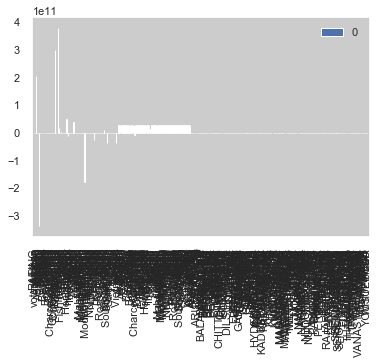

In [383]:
## Considered RATING , cities , VOTES , CUISINE variable for this model 

model = LinearRegression() 
model_fit(model,train_train_X, test_train_X, train_train_y, test_train_y)

Train RMSE :  464.7776976584845
Test RMSE :  536.0731615198318
number of features used:  65


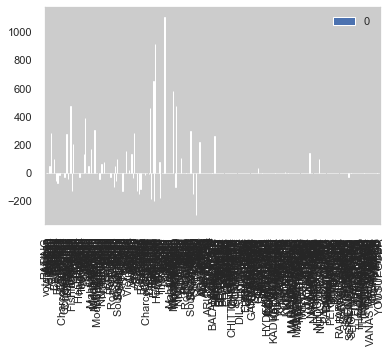

In [382]:
## Considered RATING , cities , VOTES , CUISINE variable for this model 
model = Lasso()
model_fit(model,train_train_X, test_train_X, train_train_y, test_train_y)

In [361]:
train_train_X1.shape

(8883, 261)

In [362]:
test_train_X1.shape

(3807, 261)

In [363]:
train_train_y1.shape

(8883,)

In [364]:
test_train_y1.shape

(3807,)

Train RMSE :  565.0036536409639
Test RMSE :  633.1377880564909


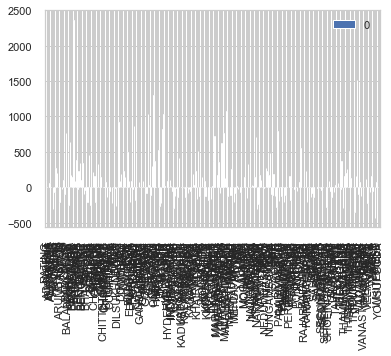

In [374]:
## Considered RATING , cities , VOTES variable for this model  ( Removed Cuisine variable )
model = LinearRegression() 
model_fit(model,train_train_X1, test_train_X1, train_train_y1, test_train_y1)